In [1]:
import numpy as np
from scipy.interpolate import make_interp_spline
from ising2d import ising2d, TC_ONSAGER
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

In [2]:
def find_max_x(x, y, num_points=1000, kind=3, ax=None):
    """
    Find the x-value corresponding to the maximum y after spline interpolation.
    """
    sorted_indices = np.argsort(x)
    x_sorted = np.array(x)[sorted_indices]
    y_sorted = np.array(y)[sorted_indices]
    
    # spline interpolation
    x_fine = np.linspace(x_sorted.min(), x_sorted.max(), num_points)
    spline = make_interp_spline(x_sorted, y_sorted, k=kind)
    y_fine = spline(x_fine)
    
    # find the index of the maximum y
    max_idx = np.argmax(y_fine)
    x_max, y_max = x_fine[max_idx], y_fine[max_idx]
    
    if ax:
        ax.plot(x_fine, y_fine, '-', label='Interpolated Curve')
    
    return x_max, y_max

def exact_magnetization_array(T_array):
    """
    Calculate the exact magnetization for the 2D Ising model (Onsager).
    """
    Tc = 2 / np.log(1 + np.sqrt(2))  # Onsager critical temperature
    m = np.zeros_like(T_array)
    idx = T_array < Tc
    x = 1 - (1 / np.sinh(2 / T_array[idx])**4)
    m[idx] = x**(1/8)
    return m

# (a)

100%|██████████| 15/15 [00:28<00:00,  1.91s/it]
/Users/matthewcox/Desktop/MIT/fa2024/10-40/sets/set9/ising2d-python/ising2d.py:162: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


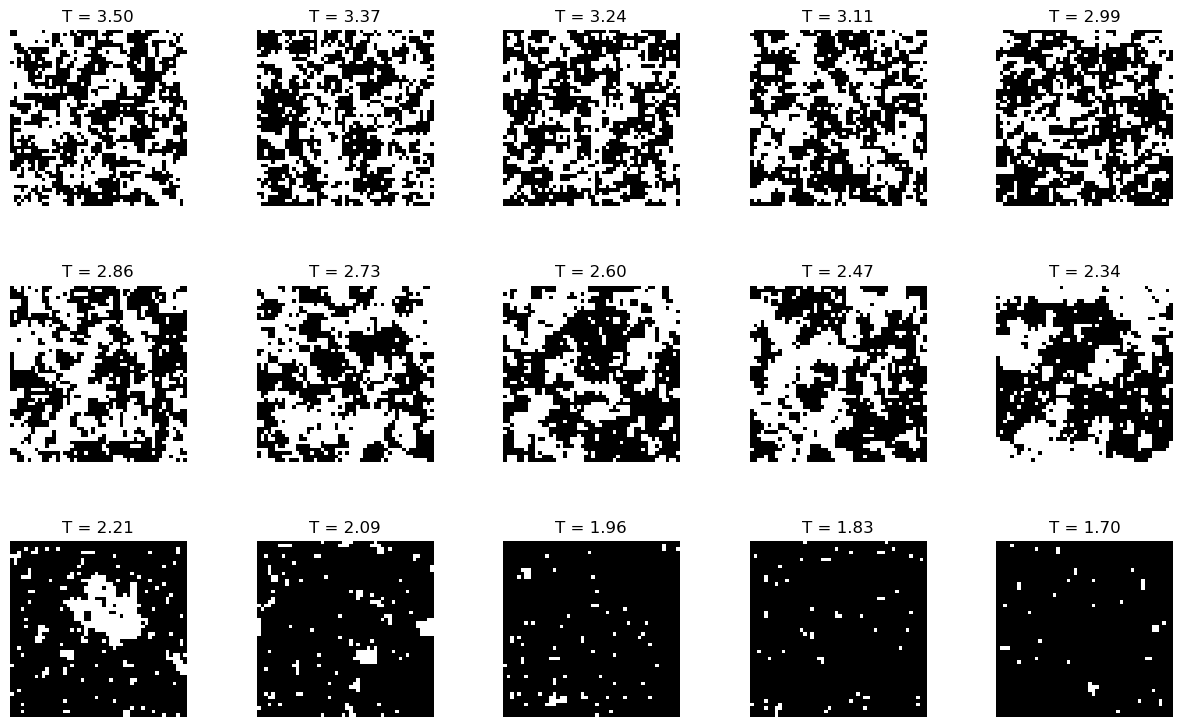

In [4]:
N = 50
T_list = np.linspace(1.7, 3.5, 15)
plot_lattice = True

# run simulation
E, M, T_list = ising2d(
    T_list, N, plot_lattice=plot_lattice
)

# (b)

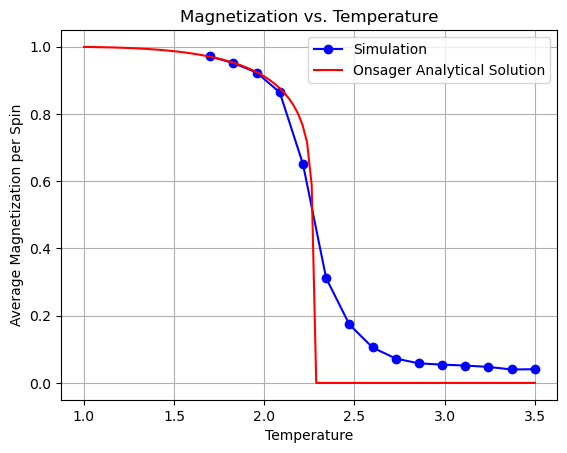

In [5]:
avg_E = np.mean(E, axis=1) / (N * N)
avg_M = np.mean(np.abs(M), axis=1) / (N * N)

 # analytical magnetization (Onsager's solution)
T_exact = np.linspace(1.0, 3.5, 100)
exact_M = exact_magnetization_array(T_exact)

# plot average magnetization vs. temperature
fig, ax = plt.subplots()
ax.plot(T_list, avg_M, 'bo-', label='Simulation')
ax.plot(T_exact, exact_M, 'r-', label='Onsager Analytical Solution')
ax.set_xlabel('Temperature')
ax.set_ylabel('Average Magnetization per Spin')
ax.set_title('Magnetization vs. Temperature')
ax.grid()
ax.legend()
plt.show()

# also plot average energy vs. temperature as a sanity check if desired
# fig, ax = plt.subplots()
# plt.plot(T_list, avg_E, 'o-')
# plt.xlabel('Temperature')
# plt.ylabel('Average Energy per Spin')
# plt.title('Energy vs. Temperature')
# plt.show()

# (c)

100%|██████████| 10/10 [00:19<00:00,  1.91s/it]
/Users/matthewcox/Desktop/MIT/fa2024/10-40/sets/set9/ising2d-python/ising2d.py:162: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


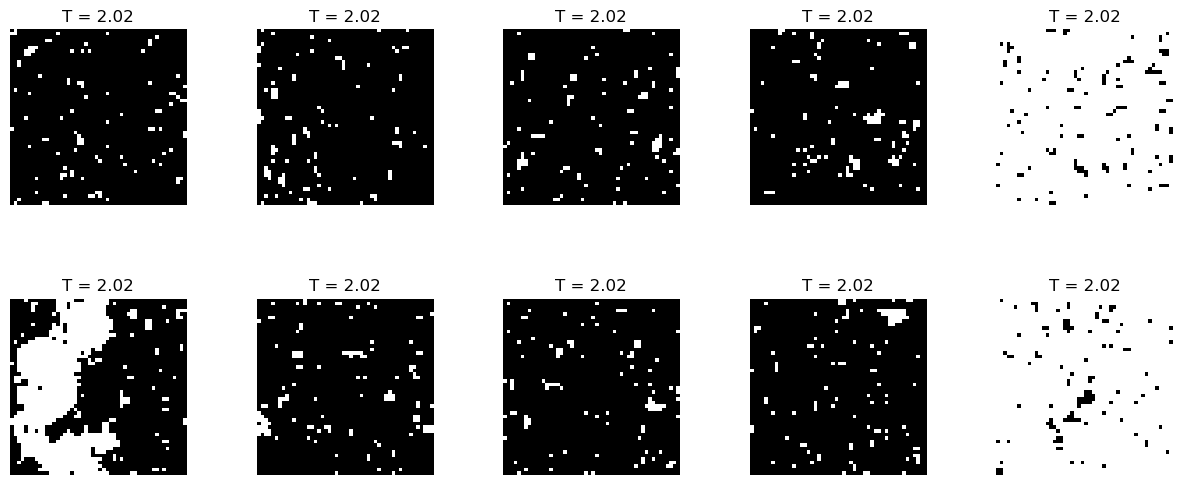

In [6]:
# run a bunch of times at some T < Tc
T_repeated = np.repeat(TC_ONSAGER - 0.25, 10)
E_repeat, M_repeat, T_repeated = ising2d(
    T_repeated, N, plot_lattice=plot_lattice, lattice_filename='lattice_repeat', reinitialize_lattice=True
)

# (d)

Tc = 2.217, C_v_max = 0.001
For reference, Onsager Tc = 2.2692


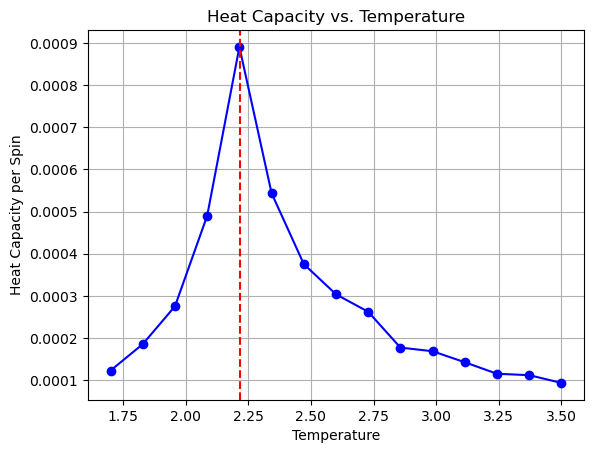

In [10]:
# calculate heat capacity per spin
E_mean = np.mean(E, axis=1) / (N * N)
E2_mean = np.mean(E**2, axis=1) / (N * N * N * N)
C_v = (E2_mean - E_mean**2) / (T_list**2)

# find the heat capacity maximum
T_max, C_v_max = find_max_x(T_list, C_v)
print(f'Tc = {T_max:.3f}, C_v_max = {C_v_max:.3f}')
print(f'For reference, Onsager Tc = {TC_ONSAGER:.4f}')

# plot heat capacity vs. temperature
fig, ax = plt.subplots()
ax.plot(T_list, C_v, 'bo-')
ax.axvline(T_max, color='r', linestyle='--', label=r'$T_\text{max}$' + f'= {T_max:.3f}')
ax.set_xlabel('Temperature')
ax.set_ylabel('Heat Capacity per Spin')
ax.set_title('Heat Capacity vs. Temperature')
ax.grid()
plt.show()

# (e)

Tc = 2.2532, maximum susceptibility = 0.0166
For reference, Onsager Tc = 2.2692


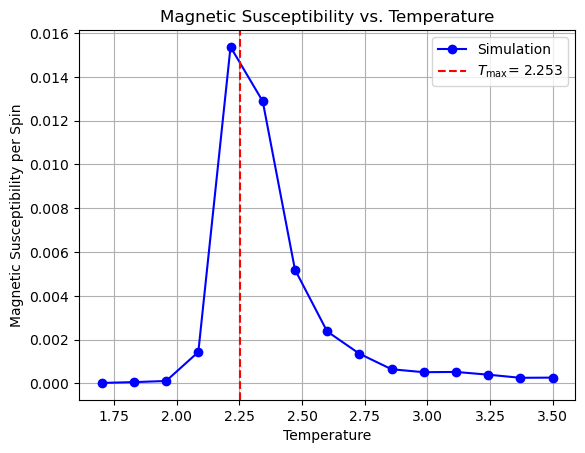

In [11]:
# calculate agnetic susceptibility per spin
M_mean = np.mean(np.abs(M), axis=1) / (N * N)
M2_mean = np.mean(M**2, axis=1) / (N * N * N * N)
chi = (M2_mean - M_mean**2) / (T_list)

# find the maximum susceptibility
T_max, chi_max = find_max_x(T_list, chi, num_points=1000, kind=3)
print(f'Tc = {T_max:.4f}, maximum susceptibility = {chi_max:.4f}')
print(f'For reference, Onsager Tc = {TC_ONSAGER:.4f}')

fig, ax = plt.subplots()

ax.plot(T_list, chi, 'bo-', label='Simulation')
ax.axvline(T_max, color='r', linestyle='--', label=r'$T_\text{max}$' + f'= {T_max:.3f}')

ax.set_xlabel('Temperature')
ax.set_ylabel('Magnetic Susceptibility per Spin')
ax.set_title('Magnetic Susceptibility vs. Temperature')
ax.legend()
ax.grid()
plt.show()